In [1]:
import numpy as np

from functools import partial

from sklearn.datasets import make_circles
from sklearn.preprocessing import FunctionTransformer
from sklearn.cluster import DBSCAN

In [2]:
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory

In [3]:
import networkx as nx

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
from giotto.mapper.mapper import make_mapper_pipeline
from giotto.mapper import OneDimensionalCover

In [6]:
T = 100000
X = make_circles(n_samples=T)[0]
# X = np.array([[np.cos(2*np.pi*theta/T), np.sin(2*np.pi*theta/T)] for theta in range(T)])

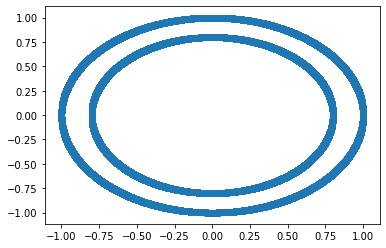

In [7]:
plt.scatter(X[:, 0], X[:, 1])

# Basic usage

Instantiate a filter function transformer

In [8]:
def proj(x, coords=0):
    if hasattr(coords, '__iter__'):
        return x[:, coords]
    return x[:, coords, None]

filter_func = FunctionTransformer(func=partial(proj, coords=0), validate=False)

Instantiate a covering scheme on the filter range

In [9]:
cover = OneDimensionalCover(n_intervals=10)

Instantiate a clustering transformer

In [10]:
clusterer = DBSCAN(eps=0.5)

## Creating a MapperPipeline object

Set desired parallelism for clustering across the pullback cover sets

In [11]:
n_jobs_outer = 8

Use ```make_mapper_pipeline``` to create a MapperPipeline object based on the above ingredients

In [12]:
pipe = make_mapper_pipeline(filter_func=filter_func,
                            cover=cover,
                            clusterer=clusterer,
                            verbose=True,
                            n_jobs_outer=n_jobs_outer)

Run ```fit_transform``` on data array ```X``` to compute the graph object encoding the Mapper graph

In [13]:
graph = pipe.fit_transform(X)

[Pipeline] ....... (step 1 of 2) Processing filter_func, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing cover, total=   0.0s
[Pipeline] .... (step 1 of 3) Processing pullback_cover, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing clustering, total=   9.8s
[Pipeline] ............. (step 3 of 3) Processing nerve, total=   0.1s


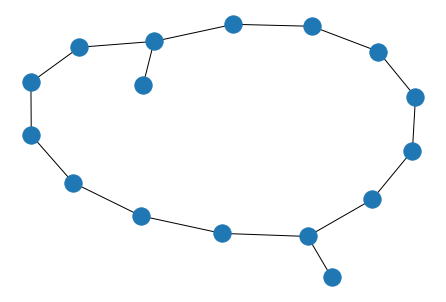

In [14]:
nx.draw(graph)

# ```get_mapper_params``` and ```set_mapper_params```

The ```get_params``` method inherited from sklearn's ```Pipeline``` class is available but reveals too much of the nested architecture of the MapperPipeline object, with a huge impact on readability.

In [15]:
pipe.get_params()

{'memory': None, 'steps': [('pullback_cover', ListFeatureUnion(n_jobs=None,
                    transformer_list=[('identity',
                                       FunctionTransformer(accept_sparse=False,
                                                           check_inverse=True,
                                                           func=None,
                                                           inv_kw_args=None,
                                                           inverse_func=None,
                                                           kw_args=None,
                                                           pass_y='deprecated',
                                                           validate=False)),
                                      ('filter_cover',
                                       Pipeline(memory=None,
                                                steps=[('filter_func',
                                                        FunctionTransfor

```get_mapper_params``` shows only a subset of the key: value pairs above, and strips off from the keys prefixes which have only to do with fine print at the implementational level.

In this way, the inner nested structure mentioned above is hidden from the viewer and only the important Mapper parameters are shown.

In [16]:
pipe.get_mapper_params()

{'memory': None,
 'verbose': True,
 'filter_func': FunctionTransformer(accept_sparse=False, check_inverse=True,
                     func=functools.partial(<function proj at 0x1234b1b90>, coords=0),
                     inv_kw_args=None, inverse_func=None, kw_args=None,
                     pass_y='deprecated', validate=False),
 'cover': OneDimensionalCover(n_intervals=10, overlap_frac=0.1),
 'filter_func__accept_sparse': False,
 'filter_func__check_inverse': True,
 'filter_func__func': functools.partial(<function proj at 0x1234b1b90>, coords=0),
 'filter_func__inv_kw_args': None,
 'filter_func__inverse_func': None,
 'filter_func__kw_args': None,
 'filter_func__pass_y': 'deprecated',
 'filter_func__validate': False,
 'cover__n_intervals': 10,
 'cover__overlap_frac': 0.1,
 'clusterer__algorithm': 'auto',
 'clusterer__eps': 0.5,
 'clusterer__leaf_size': 30,
 'clusterer__metric': 'euclidean',
 'clusterer__metric_params': None,
 'clusterer__min_samples': 5,
 'clusterer__n_jobs': None,
 'cl

Related to this is the fact that the ```set_params``` method inherited from sklearn's ```Pipeline``` class would require detailed knowledge of the inner nested structure to be used.

This is why a ```set_mapper_params``` method is implemented in ```MapperPipeline``` which effectively adds appropriate prefixes allowing the user to access the various levels of nesting.

In [17]:
pipe.set_mapper_params(filter_func=FunctionTransformer(func=partial(proj, coords=1), validate=False))

MapperPipeline(memory=None,
               steps=[('pullback_cover',
                       ListFeatureUnion(n_jobs=None,
                                        transformer_list=[('identity',
                                                           FunctionTransformer(accept_sparse=False,
                                                                               check_inverse=True,
                                                                               func=None,
                                                                               inv_kw_args=None,
                                                                               inverse_func=None,
                                                                               kw_args=None,
                                                                               pass_y='deprecated',
                                                                               validate=False)),
                                 

In [18]:
pipe.set_mapper_params(cover=OneDimensionalCover(n_intervals=15))

MapperPipeline(memory=None,
               steps=[('pullback_cover',
                       ListFeatureUnion(n_jobs=None,
                                        transformer_list=[('identity',
                                                           FunctionTransformer(accept_sparse=False,
                                                                               check_inverse=True,
                                                                               func=None,
                                                                               inv_kw_args=None,
                                                                               inverse_func=None,
                                                                               kw_args=None,
                                                                               pass_y='deprecated',
                                                                               validate=False)),
                                 

In [19]:
pipe.set_mapper_params(clusterer=DBSCAN(eps=0.2))

MapperPipeline(memory=None,
               steps=[('pullback_cover',
                       ListFeatureUnion(n_jobs=None,
                                        transformer_list=[('identity',
                                                           FunctionTransformer(accept_sparse=False,
                                                                               check_inverse=True,
                                                                               func=None,
                                                                               inv_kw_args=None,
                                                                               inverse_func=None,
                                                                               kw_args=None,
                                                                               pass_y='deprecated',
                                                                               validate=False)),
                                 

In [20]:
pipe.set_mapper_params(clusterer__eps=0.3)

MapperPipeline(memory=None,
               steps=[('pullback_cover',
                       ListFeatureUnion(n_jobs=None,
                                        transformer_list=[('identity',
                                                           FunctionTransformer(accept_sparse=False,
                                                                               check_inverse=True,
                                                                               func=None,
                                                                               inv_kw_args=None,
                                                                               inverse_func=None,
                                                                               kw_args=None,
                                                                               pass_y='deprecated',
                                                                               validate=False)),
                                 

In [21]:
pipe.set_mapper_params(min_intersection=2)

MapperPipeline(memory=None,
               steps=[('pullback_cover',
                       ListFeatureUnion(n_jobs=None,
                                        transformer_list=[('identity',
                                                           FunctionTransformer(accept_sparse=False,
                                                                               check_inverse=True,
                                                                               func=None,
                                                                               inv_kw_args=None,
                                                                               inverse_func=None,
                                                                               kw_args=None,
                                                                               pass_y='deprecated',
                                                                               validate=False)),
                                 

# Usage of the ```memory``` option and caching

This is just as in sklearn's ```Pipeline``` class

In [22]:
cachedir = mkdtemp()
memory = Memory(location=cachedir, verbose=False)

In [23]:
pipe_memory = make_mapper_pipeline(filter_func=filter_func,
                                   cover=cover,
                                   clusterer=clusterer,
                                   verbose=True,
                                   n_jobs_outer=n_jobs_outer,
                                   memory=memory)

In [24]:
pipe_memory.fit_transform(X)

[Pipeline] ....... (step 1 of 2) Processing filter_func, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing cover, total=   0.0s
[Pipeline] .... (step 1 of 3) Processing pullback_cover, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing clustering, total=   9.6s
[Pipeline] ............. (step 3 of 3) Processing nerve, total=   0.1s


Repeating ```fit_transform``` on the same data and with the same parameters triggers access to intermediate cached return values from each transformer, **except the last one (Nerve)**.

In [25]:
pipe_memory.fit_transform(X)

[Pipeline] ............. (step 3 of 3) Processing nerve, total=   0.1s


Changing the parameter of a late transformer means the next call to fit_transform will not recompute earlier steps.

In [26]:
pipe_memory.set_mapper_params(clusterer__eps=0.7)

MapperPipeline(memory=Memory(location=/var/folders/8d/05mg3tln65v3x2qxs9pxfgkm0000gn/T/tmp5dnlz5oj/joblib),
               steps=[('pullback_cover',
                       ListFeatureUnion(n_jobs=None,
                                        transformer_list=[('identity',
                                                           FunctionTransformer(accept_sparse=False,
                                                                               check_inverse=True,
                                                                               func=None,
                                                                               inv_kw_args=None,
                                                                               inverse_func=None,
                                                                               kw_args=None,
                                                                               pass_y='deprecated',
                                                  

In [27]:
pipe_memory.fit_transform(X)

[Pipeline] ........ (step 2 of 3) Processing clustering, total=  11.2s
[Pipeline] ............. (step 3 of 3) Processing nerve, total=   0.1s


Clearing the cache.

In [28]:
rmtree(cachedir)